# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd

In [2]:
data=pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

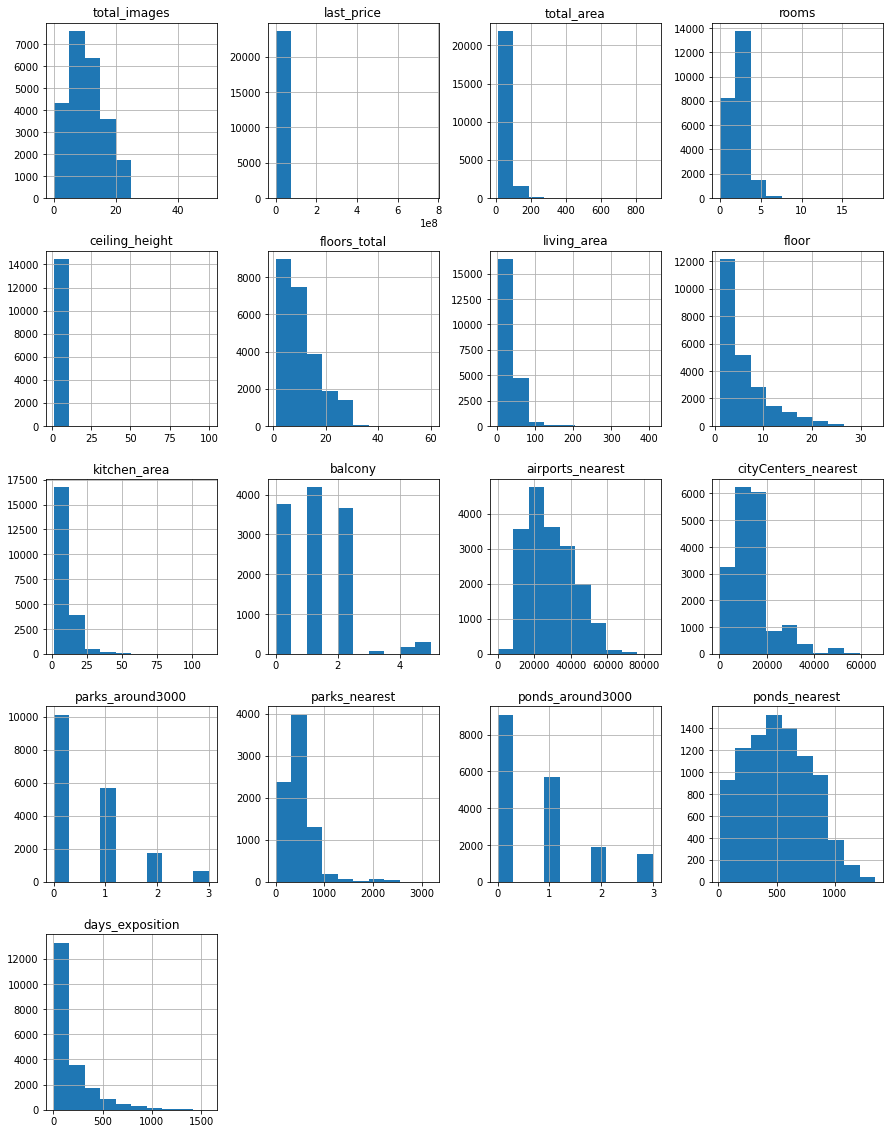

In [6]:
data.hist(figsize=(15, 20)); # построим гистограммы для каждого столбца

В исходных данных всего 23 699 строк и 22 столбца:
-  airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
-  balcony — число балконов
-  ceiling_height — высота потолков (м)
-  cityCenters_nearest — расстояние до центра города (м)
-  days_exposition — сколько дней было размещено объявление (от публикации до снятия)
-  first_day_exposition — дата публикации
-  floor — этаж
-  floors_total — всего этажей в доме
-  is_apartment — апартаменты (булев тип)
-  kitchen_area — площадь кухни в квадратных метрах (м²)
-  last_price — цена на момент снятия с публикации
-  living_area — жилая площадь в квадратных метрах (м²)
-  locality_name — название населённого пункта
-  open_plan — свободная планировка (булев тип)
-  parks_around3000 — число парков в радиусе 3 км
-  parks_nearest — расстояние до ближайшего парка (м)
-  ponds_around3000 — число водоёмов в радиусе 3 км
-  ponds_nearest — расстояние до ближайшего водоёма (м)
-  rooms — число комнат
-  studio — квартира-студия (булев тип)
-  total_area — общая площадь квартиры в квадратных метрах (м²)
-  total_images — число фотографий квартиры в объявлении

Пропущенны данные в 14 столбцах: ceiling_height, floors_total, living_area, is_apartment, kitchen_area, balcony, locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition.
Также некорректно указаны типы данных.
На гистограммах каких-то больших выбросов не наблюдается.

### Предобработка данных

In [7]:
data.isna().sum() #проверим количество пропусков в каждом столбце

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Рассмотрим уникальные значения в каждом столбце.

In [8]:
# посмотрим значения в столбцах для выявления нестандартных значений, ошибок и некорректных типов данных.
# следующие столбцы оставим без изменений:
data['total_images'].unique() # число фотографий
data['studio'].unique() # квартира-студия
data['open_plan'].unique() # свободная планировка
data['floor'].unique() # этаж

array([ 8,  1,  4,  9, 13,  5,  6, 22, 26,  7,  3,  2, 11, 15, 18, 10, 19,
       16, 20, 27, 25, 17, 14, 12, 21, 28, 24, 23, 30, 29, 32, 33, 31])

In [9]:
data['last_price'].unique() # цена

array([13000000.,  3350000.,  5196000., ...,  6151120., 21400000.,
       11475000.])

In [10]:
print("Минимальное значений - ", data['last_price'].min())
print("Максимальное значение - ", data['last_price'].max()) # посмотрим на максимальное и минимальное значение

Минимальное значений -  12190.0
Максимальное значение -  763000000.0


Аномальные значения минимальной и максимальной цены. 12 тыс. - очень мало для квартиры, 763 млн. - очень много. Проверим стоимость анологичных квартир с похожими параметрами.

In [11]:
data.query('last_price==763000000') # посмотрим подробнее квартиру с максимальной ценой

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
12971,19,763000000.0,400.0,2017-09-30T00:00:00,7,NaN,10.0,250.0,10,NaN,False,False,NaN,2.0,Санкт-Петербург,25108.0,3956.0,1.0,530.0,3.0,756.0,33.0


In [12]:
data.query('last_price>100000000 and 500>total_area>300') # рассмотрим квартиры больше 100 млн

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
793,20,135000000.0,310.0,2018-05-22T00:00:00,4,3.30,5.0,250.0,2,NaN,False,False,50.0,NaN,Санкт-Петербург,34159.0,7251.0,2.0,295.0,3.0,190.0,342.0
1026,20,155000000.0,310.0,2018-10-12T00:00:00,5,5.30,3.0,190.0,3,NaN,False,False,63.0,2.0,Санкт-Петербург,24899.0,4785.0,0.0,NaN,1.0,603.0,NaN
2243,9,130278280.0,304.0,2015-07-24T00:00:00,5,3.11,9.0,NaN,7,NaN,False,False,NaN,0.0,Санкт-Петербург,25593.0,5913.0,2.0,164.0,0.0,NaN,599.0
7543,20,130000000.0,307.8,2016-04-24T00:00:00,5,NaN,4.0,187.9,3,NaN,False,False,63.4,NaN,Санкт-Петербург,24899.0,4785.0,0.0,NaN,1.0,603.0,1094.0
7674,20,131000000.0,380.0,2016-09-23T00:00:00,5,3.90,6.0,150.0,4,False,False,False,NaN,1.0,Санкт-Петербург,25801.0,4504.0,2.0,161.0,1.0,635.0,901.0
12971,19,763000000.0,400.0,2017-09-30T00:00:00,7,NaN,10.0,250.0,10,NaN,False,False,NaN,2.0,Санкт-Петербург,25108.0,3956.0,1.0,530.0,3.0,756.0,33.0
13749,7,240000000.0,410.0,2017-04-01T00:00:00,6,3.40,7.0,218.0,7,NaN,False,False,40.0,0.0,Санкт-Петербург,32440.0,5297.0,0.0,NaN,2.0,198.0,199.0
14706,15,401300000.0,401.0,2016-02-20T00:00:00,5,NaN,9.0,204.0,9,False,False,False,24.0,3.0,Санкт-Петербург,21912.0,2389.0,1.0,545.0,1.0,478.0,393.0
19865,20,180000000.0,347.0,2015-01-21T00:00:00,8,3.90,6.0,260.0,3,NaN,False,False,45.0,0.0,Санкт-Петербург,23962.0,3794.0,2.0,537.0,3.0,501.0,834.0
21955,19,130000000.0,431.0,2017-10-02T00:00:00,7,3.70,8.0,220.0,5,NaN,False,False,20.0,5.0,Санкт-Петербург,NaN,NaN,NaN,NaN,NaN,NaN,161.0


Стоимость квартиры 763 млн. за 400 кв.м. в Санкт-Петербурге сильно выбивается из общей выборки. Цена с похожими параметрами достигает 401 млн., что тоже аномально высоко. Удалим два таких значения.

In [13]:
data.drop(([12971, 14706]), inplace=True, axis=0)

In [14]:
data.query('last_price==12190') # рассмотрим квартиру с аномально низкой ценой

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
8793,7,12190.0,109.0,2019-03-20T00:00:00,2,2.75,25.0,32.0,25,NaN,False,False,40.5,NaN,Санкт-Петербург,36421.0,9176.0,1.0,805.0,0.0,NaN,8.0


Даже при условии, что имелось в виду 12 млн, за 109 кв.м в 9 км от цента Санкт-Петербурга, все равно, как мне кажется, это заниженная цена. Посмотрим стоимость на аналогичные квартиры.

In [15]:
data.query('120>total_area>105 and locality_name=="Санкт-Петербург"') 
# стоимость квартир с похожими параментрами как раз находится в в диапозоне 9-13 млн.руб.

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
63,2,20000000.0,118.0,2018-09-11T00:00:00,3,3.00,9.0,68.0,7,NaN,False,False,16.0,NaN,Санкт-Петербург,26055.0,4800.0,1.0,648.0,1.0,779.0,37.0
179,5,14800000.0,108.7,2019-04-11T00:00:00,3,4.00,5.0,72.4,5,NaN,False,False,8.0,NaN,Санкт-Петербург,23017.0,2559.0,1.0,559.0,0.0,NaN,NaN
213,11,8700000.0,111.4,2016-10-10T00:00:00,4,3.10,4.0,73.2,2,NaN,False,False,14.1,NaN,Санкт-Петербург,20936.0,1218.0,1.0,463.0,3.0,55.0,791.0
233,17,19800000.0,118.0,2017-12-15T00:00:00,3,2.80,25.0,62.0,3,NaN,False,False,21.5,NaN,Санкт-Петербург,36827.0,12348.0,1.0,485.0,1.0,474.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23291,14,7500000.0,109.0,2018-02-12T00:00:00,3,2.65,17.0,62.0,8,NaN,False,False,14.0,3.0,Санкт-Петербург,18551.0,21976.0,0.0,NaN,0.0,NaN,NaN
23377,20,14750000.0,106.4,2015-08-01T00:00:00,3,NaN,16.0,64.7,13,NaN,False,False,16.3,NaN,Санкт-Петербург,36691.0,12213.0,1.0,586.0,0.0,NaN,892.0
23446,19,27000000.0,110.0,2016-03-11T00:00:00,3,NaN,7.0,63.0,5,NaN,False,False,15.0,1.0,Санкт-Петербург,26819.0,5026.0,1.0,657.0,1.0,678.0,200.0
23559,20,13800000.0,108.6,2016-09-12T00:00:00,3,NaN,19.0,70.6,7,NaN,False,False,10.3,2.0,Санкт-Петербург,19499.0,4844.0,0.0,NaN,1.0,503.0,354.0


In [16]:
 # заменим цену на 12 млн., т.к. рассмотрев аналогичные предложения, цена в 12 млн. похожа на правду
data.loc[data['last_price']==12190, 'last_price']=12190000

In [17]:
print(data['last_price'].min(), data['last_price'].max())

430000.0 420000000.0


In [18]:
data['last_price']=data['last_price'].astype('int') # приведем цену к целочисленному формату, т.к. стоимость без копеек

In [19]:
data['is_apartment'].unique() # аппартаменты

array([nan, False, True], dtype=object)

In [20]:
# заменим пропущенные значения на False, т.к. если в этом столбце пропущено значение, то скорее всего это не аппартаменты
# приведем к булеву типу
data['is_apartment'] = data['is_apartment'].fillna(False).astype('bool')

In [21]:
data['first_day_exposition'].unique() # дата публикации

array(['2019-03-07T00:00:00', '2018-12-04T00:00:00',
       '2015-08-20T00:00:00', ..., '2014-12-29T00:00:00',
       '2016-09-12T00:00:00', '2015-07-19T00:00:00'], dtype=object)

In [22]:
# переведем столбец с датой в формат даты без времени, т.к. время не указано 
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%d')

In [23]:
data['balcony'].unique() # число балконов

array([nan,  2.,  0.,  1.,  5.,  4.,  3.])

In [24]:
# пропущенные значения заменим на 0, т.к. скорее всего в объекте нет балкона и приведем к целочисленному типу
data['balcony']=data['balcony'].fillna(0).astype('int')

In [25]:
data['days_exposition'].unique() # сколько дней было размещено объявление, здесь пропуски не меняем 

array([  nan,   81.,  558., ..., 1360., 1007.,  971.])

In [26]:
data['parks_around3000'].unique() # число парков в радиусе 3 км

array([ 1.,  0.,  2., nan,  3.])

In [27]:
data['ponds_around3000'].unique() # число водоемов в радиусе 3 км

array([ 2.,  0.,  3.,  1., nan])

Пропущенные значения в столбцах "число парков в радиусе 3 км" и "число водоемов в радиусе 3 км", скорее всего связано с отсутствие парков и водоемов вблизи объектов, поэтому пропущунные значения заменим на 0 и изменим тип данных на целочисленный

In [28]:
data['parks_around3000'] = data['parks_around3000'].fillna(0).astype('int')

In [29]:
data['ponds_around3000'] = data['ponds_around3000'].fillna(0).astype('int')

In [30]:
data['total_area'].unique() # общая площадь квартиры

array([108.  ,  40.4 ,  56.  , ...,  66.86, 133.81,  76.75])

In [31]:
data['total_area'].describe() # площадь квартир варьируется от 12 до 900 кв.м. В принципе, такое может быть.

count    23697.000000
mean        60.319943
std         35.518368
min         12.000000
25%         40.000000
50%         52.000000
75%         69.800000
max        900.000000
Name: total_area, dtype: float64

#### Количество комнат

In [32]:
data['rooms'].unique() # число комнат

array([ 3,  1,  2,  4,  5,  6,  0,  7, 11,  8, 14, 10, 15,  9, 19, 16, 12])

В столбце "число комнат" присутствует значение ноль. Если это студия, то это значение оправдано, т.к. в студии отсутсвует межкомнатное разделение и комната, кухня и коридор это одно помещение, поэтому если тип недвижимости - студия, бедем считать, что там нет комнаты.

In [33]:
print('Количество значений, где 0 комнат равно ', data[data['rooms']==0]['rooms'].count()) # считаем всего значений, где rooms=0

Количество значений, где 0 комнат равно  197


In [34]:
# проверим условие, где число комнат равно нулю и объект недвижимости является студия
data.query('rooms==0 and studio==1')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
144,1,2450000,27.00,2017-03-30,0,NaN,24.0,15.50,2,False,True,False,NaN,2,посёлок Мурино,NaN,NaN,0,NaN,0,NaN,181.0
440,8,2480000,27.11,2018-03-12,0,NaN,17.0,24.75,4,False,True,False,NaN,2,Санкт-Петербург,38171.0,15015.0,0,NaN,2,982.0,64.0
608,2,1850000,25.00,2019-02-20,0,NaN,10.0,NaN,7,False,True,False,NaN,0,посёлок Шушары,NaN,NaN,0,NaN,0,NaN,29.0
697,12,2500000,24.10,2017-12-01,0,2.75,25.0,17.50,21,False,True,False,NaN,0,деревня Кудрово,NaN,NaN,0,NaN,0,NaN,201.0
716,5,1500000,17.00,2017-06-07,0,2.70,9.0,12.00,1,False,True,False,NaN,0,посёлок Шушары,18654.0,29846.0,0,NaN,0,NaN,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22867,8,3090000,30.00,2017-12-17,0,NaN,25.0,18.20,5,False,True,False,NaN,0,Санкт-Петербург,35250.0,16414.0,0,NaN,1,400.0,211.0
22877,2,4280000,28.00,2017-10-26,0,2.70,19.0,18.00,10,False,True,False,NaN,0,Санкт-Петербург,18982.0,7206.0,0,NaN,1,415.0,151.0
23210,7,3200000,26.00,2017-09-01,0,NaN,25.0,18.00,16,False,True,False,NaN,0,Санкт-Петербург,11405.0,13222.0,0,NaN,1,623.0,14.0
23554,15,3350000,26.00,2018-09-07,0,NaN,19.0,NaN,8,False,True,False,NaN,0,Санкт-Петербург,18090.0,17092.0,0,NaN,2,112.0,31.0


Таких значений 138, проверим, что с оставшимися 59, где число комнат равно 0 и это не студия

In [35]:
data.query('rooms==0 and studio!=1') # рассмотрим эти объекты подробнее

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
349,4,2320000,25.00,2017-09-27,0,NaN,14.0,17.0,1,False,False,True,NaN,0,деревня Кудрово,NaN,NaN,0,NaN,0,NaN,45.0
508,0,3375000,34.40,2017-03-28,0,NaN,26.0,24.3,19,False,False,True,NaN,1,посёлок Парголово,53115.0,19292.0,0,NaN,1,593.0,430.0
780,9,2600000,26.10,2018-02-20,0,NaN,18.0,NaN,8,False,False,True,NaN,1,посёлок Мурино,NaN,NaN,0,NaN,0,NaN,45.0
839,14,1900000,35.00,2017-04-14,0,2.70,5.0,15.0,3,False,False,True,NaN,1,поселок Новый Свет,NaN,NaN,0,NaN,0,NaN,7.0
946,5,2200000,23.00,2016-09-27,0,NaN,27.0,18.0,7,False,False,True,NaN,2,посёлок Мурино,NaN,NaN,0,NaN,0,NaN,483.0
1574,0,2200000,22.00,2017-11-03,0,NaN,18.0,15.0,16,False,False,True,NaN,1,деревня Кудрово,NaN,NaN,0,NaN,0,NaN,81.0
1625,7,1980000,23.98,2018-02-01,0,NaN,4.0,10.5,3,False,False,True,NaN,1,поселок станции Корнево,NaN,NaN,0,NaN,0,NaN,120.0
2532,5,3500000,27.10,2018-02-01,0,NaN,18.0,18.7,9,False,False,True,NaN,2,Санкт-Петербург,32036.0,8175.0,0,NaN,1,644.0,70.0
3019,18,2100000,24.00,2017-11-10,0,NaN,10.0,18.0,6,False,False,True,NaN,2,Сертолово,NaN,NaN,0,NaN,0,NaN,5.0
4115,7,2600000,24.00,2018-02-01,0,NaN,25.0,18.0,4,False,False,True,NaN,2,Санкт-Петербург,10031.0,13330.0,1,915.0,0,NaN,42.0


В основном эти объекты имеют общую площадь до 35 метров, что в основном является однокомнатными квартирами. Вызывают сомнения квартиры по 16-25 м2. Обычно, в таких диапозонах находятся студии.
Также наблюдаем выбивающееся значение в 371 м2 - его удалим, т.к. сложно предсказать количество комнат на такой площади.
В диапозоне 28-35 м2 заменим число комнат на 1.

In [36]:
print('Количество строк, где произведем замену в столбце rooms - ',
      data.loc[(data['rooms'] ==0) & (data['studio']!=1) & (data['total_area']>=28) & (data['total_area']<=43)]['rooms'].count())

Количество строк, где произведем замену в столбце rooms -  19


In [37]:
#произведем замену в таких значениях на 1
data.loc[((data['rooms'] ==0) & (data['studio']!=1) & (data['total_area']>=28) & (data['total_area']<=43)), 'rooms']=1

In [38]:
data.query('rooms==0 and studio!=1')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
349,4,2320000,25.00,2017-09-27,0,NaN,14.0,17.0,1,False,False,True,NaN,0,деревня Кудрово,NaN,NaN,0,NaN,0,NaN,45.0
780,9,2600000,26.10,2018-02-20,0,NaN,18.0,NaN,8,False,False,True,NaN,1,посёлок Мурино,NaN,NaN,0,NaN,0,NaN,45.0
946,5,2200000,23.00,2016-09-27,0,NaN,27.0,18.0,7,False,False,True,NaN,2,посёлок Мурино,NaN,NaN,0,NaN,0,NaN,483.0
1574,0,2200000,22.00,2017-11-03,0,NaN,18.0,15.0,16,False,False,True,NaN,1,деревня Кудрово,NaN,NaN,0,NaN,0,NaN,81.0
1625,7,1980000,23.98,2018-02-01,0,NaN,4.0,10.5,3,False,False,True,NaN,1,поселок станции Корнево,NaN,NaN,0,NaN,0,NaN,120.0
2532,5,3500000,27.10,2018-02-01,0,NaN,18.0,18.7,9,False,False,True,NaN,2,Санкт-Петербург,32036.0,8175.0,0,NaN,1,644.0,70.0
3019,18,2100000,24.00,2017-11-10,0,NaN,10.0,18.0,6,False,False,True,NaN,2,Сертолово,NaN,NaN,0,NaN,0,NaN,5.0
4115,7,2600000,24.00,2018-02-01,0,NaN,25.0,18.0,4,False,False,True,NaN,2,Санкт-Петербург,10031.0,13330.0,1,915.0,0,NaN,42.0
4437,10,3200000,25.00,2017-10-16,0,NaN,9.0,18.6,9,False,False,True,NaN,2,Санкт-Петербург,11943.0,11710.0,1,518.0,1,232.0,97.0
4876,7,3000000,25.00,2017-09-27,0,27.00,25.0,17.0,17,False,False,True,NaN,2,посёлок Мурино,NaN,NaN,0,NaN,0,NaN,28.0


Осталось 40 значений, предлагаю их удалить

In [39]:
index_drop_rooms=data.query('rooms==0 and studio!=1').index

In [40]:
data.drop(index_drop_rooms, inplace=True, axis=0)

#### Высота потолков

In [41]:
data['ceiling_height'].unique() # высота потолков

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

В столбце "высота потолков" есть значения больше 20 м. . Например, в столбце ceiling_height может быть указана высота потолков 25 м и 32 м. Логично предположить, что на самом деле это вещественные значения: 2.5 м и 3.2 м. Таже в данных присутствует объект с высотой потолков 100 м. Скорее всего, это аномалия и это значение надо удалить из выборки.

In [42]:
ceil_index = data.query('40>ceiling_height>19').index # находим индексы значений, где высота потолков от 20 до 40 м

In [43]:
data.loc[ceil_index, 'ceiling_height']=data.loc[ceil_index, 'ceiling_height']/10 # делим эти значения на 10

In [44]:
data['ceiling_height'].describe() # обращаем внимание, что макс высота потолков 100 м, мин 1 м. Найдем такие значения и удалим

count    14497.000000
mean         2.735743
std          0.866786
min          1.000000
25%          2.510000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

In [45]:
data.query('ceiling_height>7 or ceiling_height<2')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3474,3,1400000,30.0,2018-03-16,1,8.00,5.0,15.3,2,False,False,False,7.30,0,деревня Нурма,NaN,NaN,0,NaN,0,NaN,125.0
5712,5,1500000,42.8,2017-08-14,2,1.20,2.0,27.5,1,False,False,False,5.20,0,городской посёлок Мга,NaN,NaN,0,NaN,0,NaN,248.0
5863,20,5650000,45.0,2018-08-15,1,8.30,16.0,19.3,14,False,False,False,8.30,1,Санкт-Петербург,13069.0,10763.0,0,NaN,1,613.0,14.0
15061,19,5600000,56.4,2018-05-11,2,14.00,14.0,32.4,5,False,False,False,9.10,2,Санкт-Петербург,14814.0,13610.0,0,NaN,0,NaN,315.0
15743,14,5600000,67.0,2016-11-11,3,8.00,16.0,41.0,1,False,False,False,8.00,0,Санкт-Петербург,32691.0,11035.0,1,723.0,0,NaN,474.0
16934,5,4100000,40.0,2017-10-17,1,1.75,37.0,17.4,5,False,False,False,8.34,0,Санкт-Петербург,18732.0,20444.0,0,NaN,3,80.0,71.0
17442,0,5350000,54.0,2015-06-16,2,8.00,5.0,29.0,2,False,False,False,NaN,1,Красное Село,24638.0,28062.0,0,NaN,0,NaN,469.0
22309,20,5300000,45.0,2017-09-30,1,10.30,16.0,15.5,15,False,False,False,NaN,0,Санкт-Петербург,36353.0,11936.0,2,440.0,2,450.0,136.0
22590,16,6000000,55.0,2018-10-31,2,1.00,12.0,32.4,7,False,False,False,10.00,0,Санкт-Петербург,33053.0,14217.0,2,293.0,2,289.0,13.0
22869,0,15000000,25.0,2018-07-25,1,100.00,5.0,14.0,5,True,False,False,11.00,5,Санкт-Петербург,34963.0,8283.0,1,223.0,3,30.0,19.0


10 значений аномально отличаются по высоте потолков:
100 м - такого быть не может;
1-1.75 м - слишком низко для квартир, возможно, это подвалы;
8-15 м  - слишком выбиваются из диапазона, даже при условии двухуровневой квартиры такого быть не может.
Удалим эти объекты.

In [46]:
ceil_drop_index = data.query('ceiling_height>7 or ceiling_height<2').index # индексы значений для удаления

In [47]:
data.drop(ceil_drop_index, inplace=True, axis=0) # удаление

In [48]:
data['ceiling_height'].describe() # после удаленя высота потолков варьируется от 2 м до 6 м.

count    14487.000000
mean         2.726549
std          0.278679
min          2.000000
25%          2.510000
50%          2.650000
75%          2.800000
max          6.000000
Name: ceiling_height, dtype: float64

10 строк с аномальными значениями удалены. Теперь заполним пропущенные значения. Заполним пропуски по значению медианы - 2.65 м., т.к. медиана меньше реагирует на выбросы

In [49]:
data['ceiling_height'] = data['ceiling_height'].fillna(2.65) #заменим пропущенные значения на медиану

In [50]:
print('Количество пропущенных значений в столбце ceiling_height', data['ceiling_height'].isna().sum())

Количество пропущенных значений в столбце ceiling_height 0


#### Всего этажей в доме

In [51]:
data['floors_total'].unique() # всего этажей в доме

array([16., 11.,  5., 14., 12., 26., 24., 27.,  9.,  6., 17., 25.,  3.,
       23., 19., 18.,  4., 22.,  8.,  2., 10.,  7., 13., 15., nan, 20.,
       28., 36., 21., 35., 34., 60.,  1., 29., 33., 52.])

In [52]:
# выведим пропущенные значения
data[data['floors_total'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
186,12,11640000,65.2,2018-10-02,2,2.65,NaN,30.80,4,False,False,False,12.00,0,Санкт-Петербург,39197.0,12373.0,1,123.0,0,NaN,49.0
237,4,2438033,28.1,2016-11-23,1,2.65,NaN,20.75,1,False,False,False,NaN,0,Санкт-Петербург,22041.0,17369.0,0,NaN,1,374.0,251.0
457,4,9788348,70.8,2015-08-01,2,2.65,NaN,38.40,12,False,False,False,10.63,0,Санкт-Петербург,37364.0,8322.0,2,309.0,2,706.0,727.0
671,4,6051191,93.6,2017-04-06,3,2.65,NaN,47.10,8,False,False,False,16.80,0,Санкт-Петербург,22041.0,17369.0,0,NaN,1,374.0,123.0
1757,5,3600000,39.0,2017-04-22,1,2.65,NaN,NaN,9,False,False,False,NaN,0,Санкт-Петербург,22735.0,11618.0,1,835.0,1,652.0,77.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22542,5,8500000,63.5,2017-05-24,2,2.80,NaN,NaN,3,False,False,False,NaN,0,Санкт-Петербург,51340.0,15363.0,0,NaN,1,853.0,512.0
22656,4,4574160,64.5,2017-04-02,2,2.65,NaN,31.70,20,False,False,False,14.40,0,Санкт-Петербург,22041.0,17369.0,0,NaN,1,374.0,127.0
22808,0,14569263,110.4,2016-11-20,3,2.65,NaN,45.38,6,False,False,False,23.42,0,Санкт-Петербург,19095.0,4529.0,0,NaN,0,NaN,260.0
23590,0,21187872,123.3,2017-04-25,3,2.65,NaN,50.40,18,False,False,False,23.60,0,Санкт-Петербург,19095.0,4529.0,0,NaN,0,NaN,104.0


In [53]:
data['floors_total'].describe() # никакой закономерности в общем количестве этажей я не вижу, пока оставим без изменений

count    23561.000000
mean        10.660838
std          6.587928
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

In [54]:
data[data['floors_total']<data['floor']] # проверим, чтобы общее количество этажей было больше этажа квартиры
# таких значений нет

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


#### Наименование населенного пункта

In [55]:
data['locality_name'].unique() # название населенного пункта

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [56]:
data['locality_name'].value_counts()

Санкт-Петербург                                      15694
посёлок Мурино                                         515
посёлок Шушары                                         440
Всеволожск                                             398
Пушкин                                                 369
                                                     ...  
деревня Курковицы                                        1
посёлок при железнодорожной станции Приветнинское        1
садовое товарищество Приладожский                        1
деревня Большой Сабск                                    1
посёлок Сумино                                           1
Name: locality_name, Length: 363, dtype: int64

In [57]:
print('Количество уникальных значений населенного пункта -', data['locality_name'].nunique())

Количество уникальных значений населенного пункта - 363


In [58]:
data['new_name'] = data['locality_name'] # создадим новую колонку и укажаем название населенного пункта без его типа

In [59]:
data['new_name'] = data['new_name'].str.replace('поселок городского типа ','')
data['new_name'] = data['new_name'].str.replace('посёлок городского типа ','')
data['new_name'] = data['new_name'].str.replace('городской поселок ','')
data['new_name'] = data['new_name'].str.replace('городской посёлок ','')
data['new_name'] = data['new_name'].str.replace('посёлок ','')
data['new_name'] = data['new_name'].str.replace('поселок ','')
data['new_name'] = data['new_name'].str.replace('подеревняк ','')
data['new_name'] = data['new_name'].str.replace('деревня ','')
data['new_name'] = data['new_name'].str.replace('при железнодорожной станции ','')
data['new_name'] = data['new_name'].str.replace('село ','')
data['new_name'] = data['new_name'].str.replace('садоводческое некоммерческое товарищество ','')
data['new_name'] = data['new_name'].str.replace('садовое товарищество ','')
data['new_name'] = data['new_name'].str.replace('садоводческое товарищество ','')
data['new_name'] = data['new_name'].str.replace('коттеджный ','')
data['new_name'] = data['new_name'].str.replace('станции ','')

In [60]:
data['new_name'].unique()

array(['Санкт-Петербург', 'Шушары', 'Янино-1', 'Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'Кудрово',
       'Коммунар', 'Колпино', 'Красный Бор', 'Гатчина', 'Фёдоровское',
       'Выборг', 'Кронштадт', 'Кировск', 'Новое Девяткино',
       'Металлострой', 'Лебяжье', 'Сиверский', 'Молодцово',
       'Кузьмоловский', 'Новая Ропша', 'Павловск', 'Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'Куттузи', 'Аннино', 'Ефимовский', 'Плодовое', 'Заклинье',
       'Торковичи', 'Первомайское', 'Красное Село', 'Понтонный',
       'Сясьстрой', 'Старая', 'Лесколово', 'Новый Свет', 'Сланцы',
       'Путилово', 'Ивангород', 'Шлиссельбург', 'Никольское',
       'Зеленогорск', 'Сосновый Бор', 'Оржицы', 'Кальтино', 'Романовка',
       'Бугры', 'Рощино', 'Кириши', 'Луга', 'Волосово', 'Отрадное',
       'Павлово', 'Оредеж', 'Копорье', 'Молодёжное', 'Тихвин', 'Победа',
       'Нурма', 'Синявино', 'Тосно', 'Стрельна', 'Бокситогорск',

In [61]:
print('Количество уникальных значений населенного пункта после обработки -', data['new_name'].nunique())

Количество уникальных значений населенного пункта после обработки - 304


Таким образом, привели названия населенных пунктов к одному виду и сократили количесво уникальных значений на 59.

In [62]:
print('Количество пропущенных значений в столбце new_name - ', data['new_name'].isna().sum())

Количество пропущенных значений в столбце new_name -  49


Так как количество пропущенных значений меньше 1 % удалим их, т.к. для дальнейшего анализа нам нужно знать название населенного пункта

In [63]:
data=data.dropna(subset=['new_name']) # удаляем пропущенные значения в колонке

#### Расстояние до аэропорта, центра, парка и водоема

In [64]:
data['airports_nearest'].unique() # расстояние до аэропорта

array([18863., 12817., 21741., ..., 11751., 20151., 24665.])

In [65]:
data['cityCenters_nearest'].unique() # расстояние до центра города

array([16028., 18603., 13933., ..., 27977.,  7262.,  6263.])

In [66]:
data['parks_nearest'].unique() # расстояние до ближайщего парка

array([4.820e+02,       nan, 9.000e+01, 8.400e+01, 1.120e+02, 3.100e+02,
       2.940e+02, 5.900e+02, 4.200e+02, 7.590e+02, 2.480e+02, 5.170e+02,
       4.110e+02, 4.520e+02, 5.320e+02, 4.590e+02, 7.250e+02, 4.700e+01,
       6.200e+02, 6.750e+02, 5.310e+02, 5.260e+02, 2.710e+02, 3.630e+02,
       6.480e+02, 3.820e+02, 3.340e+02, 1.670e+02, 4.450e+02, 2.310e+02,
       5.110e+02, 7.510e+02, 6.660e+02, 3.840e+02, 1.270e+02, 2.410e+02,
       4.880e+02, 1.560e+02, 5.760e+02, 2.850e+02, 6.330e+02, 1.500e+01,
       2.150e+02, 5.330e+02, 1.410e+02, 3.660e+02, 3.410e+02, 5.890e+02,
       3.440e+02, 5.080e+02, 4.170e+02, 7.620e+02, 4.410e+02, 5.590e+02,
       7.490e+02, 1.230e+02, 5.010e+02, 1.000e+01, 1.133e+03, 1.205e+03,
       5.160e+02, 8.600e+02, 2.760e+02, 9.800e+02, 4.630e+02, 5.910e+02,
       2.390e+02, 6.510e+02, 1.021e+03, 4.850e+02, 5.860e+02, 3.700e+02,
       6.880e+02, 2.750e+02, 5.460e+02, 4.660e+02, 1.390e+02, 2.510e+02,
       5.370e+02, 6.270e+02, 1.040e+02, 4.500e+02, 

In [67]:
round(data['parks_nearest'], 2)

0        482.0
1          NaN
2         90.0
3         84.0
4        112.0
         ...  
23694    796.0
23695      NaN
23696      NaN
23697    173.0
23698      NaN
Name: parks_nearest, Length: 23598, dtype: float64

In [68]:
data['ponds_nearest'].unique() # расстояние до ближайшего водоема

array([ 755.,   nan,  574., ...,   40.,   30., 1134.])

#### Жилая пложадь

In [69]:
data['living_area'].value_counts()

18.00    875
17.00    669
30.00    598
16.00    484
20.00    477
        ... 
96.40      1
50.26      1
43.81      1
54.43      1
16.74      1
Name: living_area, Length: 1781, dtype: int64

Будем считать, что 
Квартира  =жилая площадь + кухня + нежилая + балкон.

Студия=жилая + нежилая

In [70]:
data['living_area'].describe() #минимальная жилая площадь 2 кв.м, это очень мало, необходимо проверить

count    21704.000000
mean        34.463142
std         21.970375
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

In [71]:
# проверим значения, где сумма площади кухни и жилой площади больше общей площади
data.query('total_area<=living_area+kitchen_area')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,new_name
184,7,2600000,30.20,2018-02-14,1,2.65,9.0,26.10,5,False,False,False,6.20,0,Санкт-Петербург,13952.0,15031.0,0,NaN,1,824.0,12.0,Санкт-Петербург
220,8,3890000,37.00,2018-07-09,1,2.50,25.0,28.00,6,False,False,False,9.00,0,Санкт-Петербург,25408.0,16166.0,0,NaN,0,NaN,28.0,Санкт-Петербург
545,9,4700000,23.80,2018-12-28,1,2.65,18.0,20.00,9,False,False,False,5.00,0,Санкт-Петербург,9731.0,11849.0,0,NaN,0,NaN,108.0,Санкт-Петербург
551,8,3100000,31.59,2018-03-08,1,2.70,19.0,30.55,2,False,False,False,9.28,2,посёлок Мурино,NaN,NaN,0,NaN,0,NaN,70.0,Мурино
601,12,5600000,53.70,2017-04-18,2,2.50,12.0,48.30,5,False,False,False,7.00,2,Санкт-Петербург,50477.0,13252.0,2,220.0,1,1250.0,167.0,Санкт-Петербург
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22693,8,7400000,82.40,2017-07-25,2,2.80,26.0,57.40,26,False,False,False,25.00,5,Санкт-Петербург,40648.0,9888.0,1,1248.0,0,NaN,482.0,Санкт-Петербург
22963,16,3150000,102.00,2018-06-26,5,2.65,9.0,78.00,8,False,False,False,24.00,1,Кингисепп,NaN,NaN,0,NaN,0,NaN,57.0,Кингисепп
23202,13,4919880,67.92,2018-10-23,2,2.65,3.0,63.00,3,False,False,False,13.04,0,Всеволожск,NaN,NaN,0,NaN,0,NaN,60.0,Всеволожск
23297,10,1850000,48.20,2019-03-13,2,2.65,5.0,42.20,2,False,False,False,6.00,1,Высоцк,NaN,NaN,0,NaN,0,NaN,45.0,Высоцк


В 133 строках было обнаружено, что общая площадь меньше чем сумма площадей жилой и кухни. Что привело к этой ошибке непонятно. Предлагаю удалить эти значения.

In [72]:
index_total_drop=data.query('total_area<=living_area+kitchen_area').index # индексы для удаления

In [73]:
data.drop(index_total_drop,  inplace=True, axis=0)

In [74]:
# проверим значения, где жилая площадь меньше площади кухни
change_area=data.query('living_area<kitchen_area')

In [75]:
change_area[['total_area', 'living_area', 'kitchen_area']]

,total_area,living_area,kitchen_area
4,100.00,32.00,41.00
6,37.30,10.60,14.40
51,161.00,38.00,50.00
53,39.10,15.40,15.50
101,37.00,12.00,13.00
...,...,...,...
23388,43.00,12.00,20.00
23481,37.29,10.08,16.88
23573,47.67,13.59,17.87
23574,139.00,3.00,16.00


Скорее всего, при заполнении данных, столбцы были перепутаны, поменяем местами площадь кухни и жилой площади в 353 колонках

In [76]:
# в новом датафрейме поменяем местами жилую площадь и площадь кухни
change_area.rename(columns={'living_area': 'kitchen', 'kitchen_area': 'living'}, inplace=True)

/opt/conda/lib/python3.9/site-packages/pandas/core/frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [77]:
data.loc[change_area.index, 'kitchen_area']=change_area['kitchen']

In [78]:
data.loc[change_area.index, 'living_area']=change_area['living']

In [79]:
data.query('living_area<kitchen_area') # больше таких значений нет

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,new_name


In [80]:
data['living_area'].describe()

count    21571.000000
mean        34.529815
std         21.941375
min          2.000000
25%         18.700000
50%         30.000000
75%         42.400000
max        409.700000
Name: living_area, dtype: float64

In [81]:
data.query('living_area<8') # рассмотрим аномально маленькие жилые площади

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,new_name
17582,11,2680000,22.0,2018-08-11,0,2.65,25.0,5.0,8,False,True,False,NaN,2,Санкт-Петербург,22735.0,11618.0,1,835.0,1,652.0,70.0,Санкт-Петербург
21758,0,2330000,23.0,2018-01-01,0,2.65,24.0,2.0,22,False,True,False,NaN,0,посёлок Мурино,NaN,NaN,0,NaN,0,NaN,66.0,Мурино


Удалим эти два значения, т.к. скорее всего изначально было некорректно указана площадь в студиях

In [82]:
data.drop(([17582, 21758]),  inplace=True, axis=0)

In [83]:
data.query('living_area<8') # сделаем проверку

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,new_name


В современных домах отношение жилой площади к общей находятся в границах 0.5-0.7. Так как у нас нет информации о дате постройки дома, сделаем допущение, что отношение жилой площади к общей будет составлять 25%

In [84]:
data.query('studio!=1 and living_area<=total_area*0.25') # выгрузка по отношению жилой площади к общей

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,new_name
1253,13,5300000,127.0,2018-07-16,3,2.65,4.0,29.41,4,False,False,False,17.53,0,Выборг,NaN,NaN,0,NaN,0,NaN,NaN,Выборг
5847,19,3700000,54.0,2018-09-07,2,2.50,14.0,12.50,11,False,False,False,12.00,2,Колпино,27638.0,33424.0,0,NaN,0,NaN,8.0,Колпино
5851,12,14900000,96.0,2017-10-18,3,2.65,16.0,20.00,4,False,False,False,15.00,2,Санкт-Петербург,38505.0,7765.0,1,496.0,2,219.0,97.0,Санкт-Петербург
8094,4,11757590,77.4,2019-04-09,2,2.75,8.0,15.20,1,False,False,False,NaN,0,Санкт-Петербург,39946.0,10720.0,1,2102.0,3,303.0,NaN,Санкт-Петербург
8325,9,4800000,52.0,2017-10-25,2,2.65,5.0,9.00,2,False,False,False,6.00,1,Санкт-Петербург,33358.0,13171.0,0,NaN,2,118.0,119.0,Санкт-Петербург
9471,4,850000,78.0,2017-05-04,3,2.65,9.0,12.50,7,False,False,False,8.50,0,Гатчина,NaN,NaN,0,NaN,0,NaN,169.0,Гатчина
11876,18,3950000,57.8,2018-12-17,2,2.50,10.0,11.50,4,False,False,False,11.50,0,деревня Новое Девяткино,NaN,NaN,0,NaN,0,NaN,98.0,Новое Девяткино
12432,10,7950000,78.9,2018-02-14,3,2.65,5.0,16.60,3,False,False,False,10.50,0,Санкт-Петербург,23071.0,4336.0,1,659.0,1,266.0,221.0,Санкт-Петербург
13792,9,4999000,85.2,2015-11-02,1,2.65,4.0,15.70,1,False,False,False,14.60,0,Сестрорецк,54104.0,35204.0,0,NaN,0,NaN,280.0,Сестрорецк
13915,20,6350000,52.0,2018-02-06,2,3.00,6.0,9.00,2,False,False,False,2.00,0,Санкт-Петербург,32453.0,6521.0,0,NaN,1,1012.0,91.0,Санкт-Петербург


Таких значений 18, очень странно выглядит, что при общей площади дома 127 кв.м. жилая всего 30 кв.м. при условии, что в квартире 3 комнаты и площадь кухни 17 кв.м. Получается на 80 кв.м. находятся коридоры, ванна, туалет и может быть гардеробная, но все равно это как-то неоправданно много. При условии, что в основном эти квартиры находятся в Санкт-Петербурге и это старый дом, такое может быть. Но этих значений не так уж и много, удалим их

In [85]:
index_drop_living_area=data.query('studio!=1 and living_area<=total_area*0.25').index

In [86]:
data.drop(index_drop_living_area,  inplace=True, axis=0)

Пропущенные значения в столбцах жилая площадь и площадь кухни заменять на медианные значения по группам считаю некорректно, т.к. мы не знаем тип дома и год постройки, чтобы значения были максимально приближены к реальности.

In [87]:
data.isna().sum() # рассмотрим количество пропусков после обработки

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               85
living_area              1894
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2223
balcony                     0
locality_name               0
airports_nearest         5459
cityCenters_nearest      5436
parks_around3000            0
parks_nearest           15443
ponds_around3000            0
ponds_nearest           14421
days_exposition          3161
new_name                    0
dtype: int64

**Выводы:**
Была произведена предобработка данных сервиса Яндекс.Недвижимость о продаже квартир в Санкт-Петербурге и соседних населенных пунктах. 
Были обработаны пропуски, там, где это возможно: наличие балкона, высота потолка, название населенных пунктов, число водоемов и парков в 3 км от квартиры
Были изменены типы значений на корректные для дальнейшего анализа данных.
Изучены уникальные значения в столбце "Название населенного пункта". Таким образом, количество уникальных значений было уменьшено с 363 до 304.
Были удалены аномальные значения из столбца "Высота потолка", а также заменены пропущенные значения на медианные, удалены или заменены аномальные значение в столбце "стоимость квартир.

Было обнаружено, что в некоторых строках Площадь кухни была больше чем Жилая площадь, скорее всего при заполнении было перепутано, удалены данные, где отношение жилой площади к общей было меньше 25%
Пропущенные значения в столбцах Площадь кухни и Жилая площадь считаю некорректно заменять на средние значения по группам, т.к. мы не знаем тип дома, чтобы можно было корректно сделать замену. Оставим эти значения без изменений.
Таким образом, при предобработке данных были удалены примерно 300 строк, что меньше процента

### Посчитайте и добавьте в таблицу новые столбцы

In [88]:
data['price_per_meter']=round(data['last_price']/data['total_area'], 2) # цена за метр квадратный

In [89]:
data['day']=data['first_day_exposition'].dt.weekday # день недели публикации

In [90]:
data['month']=data['first_day_exposition'].dt.month # месяц публикации

In [91]:
data['year']=data['first_day_exposition'].dt.year # год публикации

In [92]:
# напишем функцию категоризации по этажам, используя метод apply применимо к каждой строке датафрейма через axis = 1
def floor_category(row):
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    elif 1 < floor < floors_total:
        return 'другой'

In [93]:
data['type_floor'] = data.apply(floor_category, axis = 1)

In [94]:
data['centr_km']=round(data['cityCenters_nearest']/1000, 0) # расстояние до центра в километрах

### Проведите исследовательский анализ данных

In [95]:
import matplotlib.pyplot as plt

#### Общая площадь

In [96]:
# изучим общую площадь
data['total_area'].describe()

count    23445.000000
mean        60.356707
std         35.433943
min         12.000000
25%         40.000000
50%         52.000000
75%         69.800000
max        900.000000
Name: total_area, dtype: float64

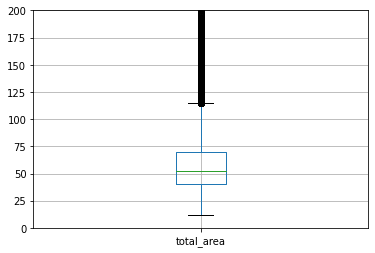

In [97]:
data.boxplot('total_area')
plt.ylim(0, 200);

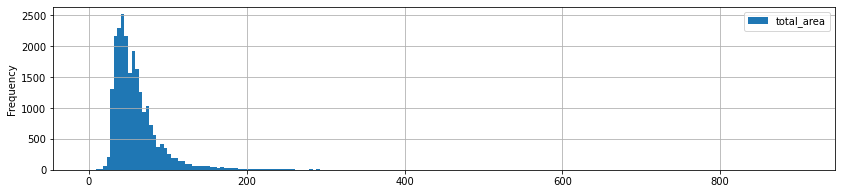

In [98]:
data.plot(y = 'total_area', kind = 'hist', bins = 200, grid=True, figsize = (14,3), range = (0,900));

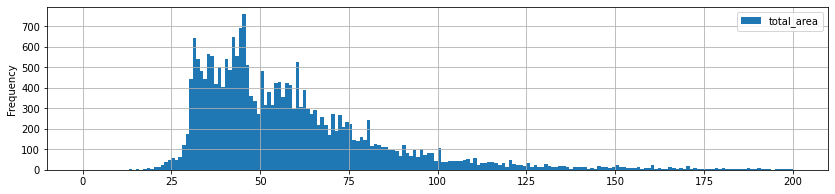

In [99]:
data.plot(y = 'total_area', kind = 'hist', bins = 200, grid=True, figsize = (14,3), range = (0,200));

Распределение данных более похоже на распределение Пуассона, есть выбросы, но они не сильно влияют на данные. Общая площадь варьируется от 12 кв.м до 900 кв.м. Средняя площадь квартиры 60.4 кв.м. Медиана равна 52 кв.м. По гистограмме видим, что больше всего объявлений квартир 30-45 кв.м, что соответствует 1-2-комнатным квартирам.

#### Жилая площадь

In [100]:
# изучим жилую площадь
data['living_area'].describe()

count    21551.000000
mean        34.543424
std         21.941491
min          8.300000
25%         18.800000
50%         30.000000
75%         42.400000
max        409.700000
Name: living_area, dtype: float64

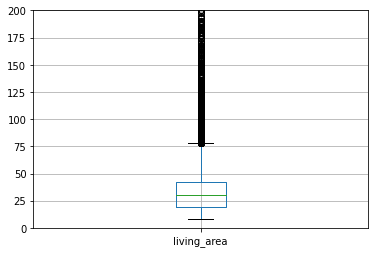

In [101]:
data.boxplot('living_area')
plt.ylim(0, 200);

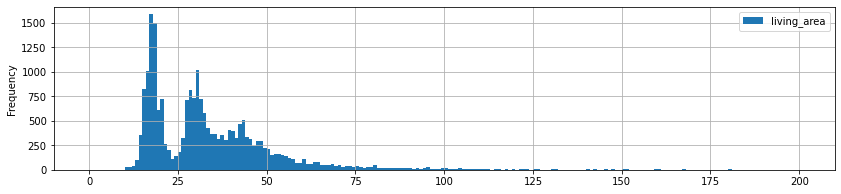

In [102]:
data.plot(y = 'living_area', kind = 'hist', bins = 200, grid=True, figsize = (14,3), range = (0,200));

В распределении наблюдается наличие двух пиков, это говорит о том, что с данными что-то не так. Жилая площадь варьируется от 8 кв.м до 409 кв.м. Средняя жилая площадь квартиры - 34.5 кв.м. Медиана равна 30 кв.м. Наиболее распространенная жилая площадь - 22-45 кв.м.

#### Площадь кухни

In [103]:
# изучим площадь кухни
data['kitchen_area'].describe()

count    21222.000000
mean        10.429558
std          5.524427
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

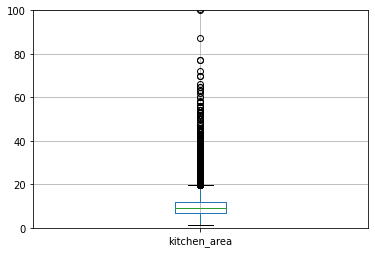

In [104]:
data.boxplot('kitchen_area')
plt.ylim(0, 100);

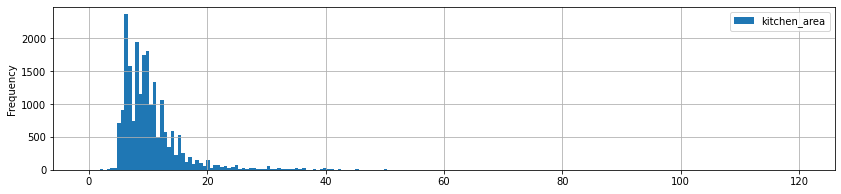

In [105]:
data.plot(y = 'kitchen_area', kind = 'hist', bins = 200, grid=True, figsize = (14,3), range = (0,120));

Распределение данных более похоже на распределение Пуассона, есть выбросы, но они не сильно влияют на данные. Общая площадь варьируется от 1.3 кв.м до 112 кв.м. Средняя площадь кухни 10.4 кв.м. Медиана равна 9.1 кв.м. По гистограмме видим, что больше всего объявлений квартир с кухней 6-10 кв.м.

#### Стоимость объекта недвижимости

In [106]:
# изучим цену объекта
data['last_price_mln']=data['last_price']/1000000
data['last_price_mln'].describe()

count    23445.000000
mean         6.496887
std          9.386739
min          0.430000
25%          3.440000
50%          4.650000
75%          6.800000
max        420.000000
Name: last_price_mln, dtype: float64

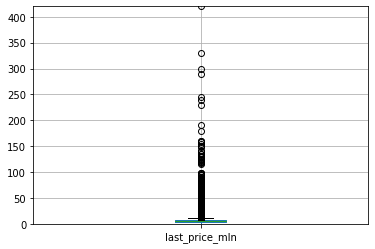

In [107]:
data.boxplot('last_price_mln')
plt.ylim(0, 420);

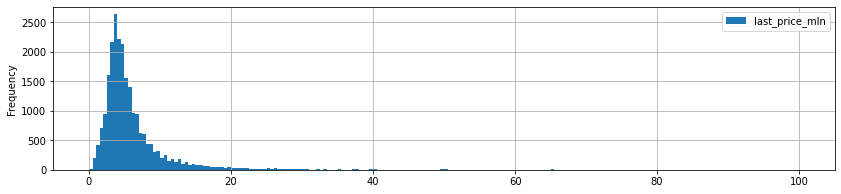

In [108]:
data.plot(y = 'last_price_mln', kind = 'hist', bins = 200, grid=True, figsize = (14,3), range = (0,100));
plt.ticklabel_format(style='plain')
plt.show()

Распределение данных более похоже на нормальное распределение, есть выбросы, но они не сильно влияют на данные. Цена варьируется от 430 тыс. до 420 млн. руб., что, скорее всего, зависит от населенного пункта. Средняя цена - 6.5 млн.руб. Медиана равна 4.65 млн.руб. 

#### Количество комнат

In [109]:
# изучим количество комнат
data['rooms'].describe()

count    23445.000000
mean         2.075283
std          1.074795
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

(0.0, 20.0)

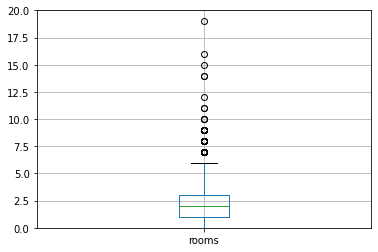

In [110]:
data.boxplot('rooms')
plt.ylim(0, 20)

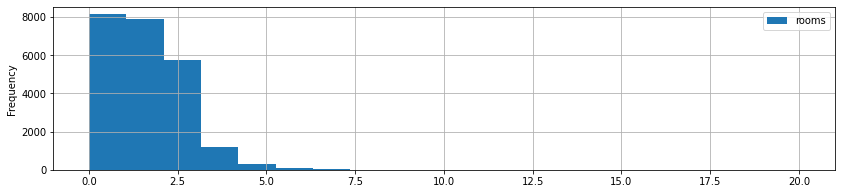

In [111]:
data.plot(y = 'rooms', kind = 'hist', bins = data['rooms'].max(), grid=True, figsize = (14,3), range = (0,20));

По гистограмме видно, что самые популярные квартиры - это однокомнатные и двухкомнатные (около 8000). Трехкомнатных квартир тоже довольно много - около 6000. Видна зависимость - чем больше комнат, тем меньше квартир в продаже. Студий в продаже не так уж и много.

#### Высота потолков

In [112]:
# изучим высоту потолков
data['ceiling_height'].describe()

count    23445.000000
mean         2.696734
std          0.220856
min          2.000000
25%          2.600000
50%          2.650000
75%          2.700000
max          6.000000
Name: ceiling_height, dtype: float64

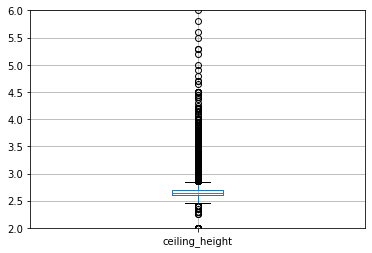

In [113]:
data.boxplot('ceiling_height')
plt.ylim(2, 6);

<AxesSubplot:ylabel='Frequency'>

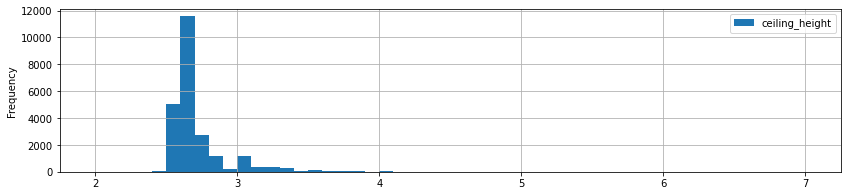

In [114]:
data.plot(y = 'ceiling_height', kind = 'hist', bins = 50, grid=True, figsize = (14,3), range = (2,7))

Больше всего квартир с высотой потолков 2.65 м. Чем выше потолок, тем это наиболее редкость. Высота потолков в объектах недвижимости варьируется от 2 до 6 м. Распределение похоже на нормальное.

#### Этаж квартиры

In [115]:
# изучим этаж квартиры
data['floor'].describe()

count    23445.000000
mean         5.881808
std          4.871071
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

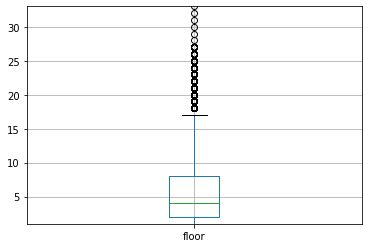

In [116]:
data.boxplot('floor')
plt.ylim(1, 33);

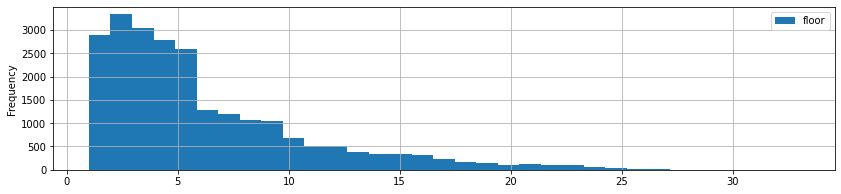

In [117]:
data.plot(y = 'floor', kind = 'hist', bins = data['floor'].max(), grid=True, figsize = (14,3), range = (1,33));

Гистограмма имеет распределение Пуассона. Наиболее распространненые квартиры для продажи на 2-5 этаже. Наблюдается взаимосвязь -  чем выше квартира расположена, тем их меньше в продаже.

#### Тип этажа квартиры

In [118]:
# тип этажа квартиры
data['type_floor'].value_counts()

другой       17188
последний     3290
первый        2885
Name: type_floor, dtype: int64

Как и ожидалось, меньше всего объявлений с квартирами на 1-ом этаже. Больше всего квартир расположено в промежутке между первым и последним этажом.

#### Всего этажей в доме

In [119]:
# изучим всего этажей в доме
data['floors_total'].describe()

count    23360.000000
mean        10.657534
std          6.578528
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

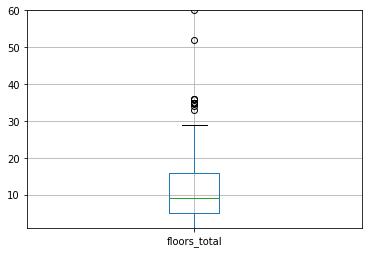

In [120]:
data.boxplot('floors_total')
plt.ylim(1, 60);

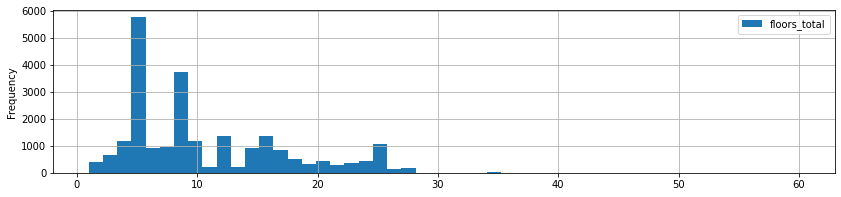

In [121]:
data.plot(y = 'floors_total', kind = 'hist', bins = 50, grid=True, figsize = (14,3), range = (1,60));

Гистограмма ближе к распределению Пуассона. Самое распростаненное количество этажей в доме - 5

#### Расстояние до цента города

In [122]:
# изучим расстояние до центра города
data['cityCenters_nearest'].describe()

count    18009.000000
mean     14207.848520
std       8614.823546
min        181.000000
25%       9254.000000
50%      13107.000000
75%      16298.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

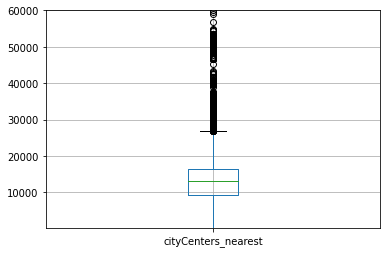

In [123]:
data.boxplot('cityCenters_nearest')
plt.ylim(180, 60000);

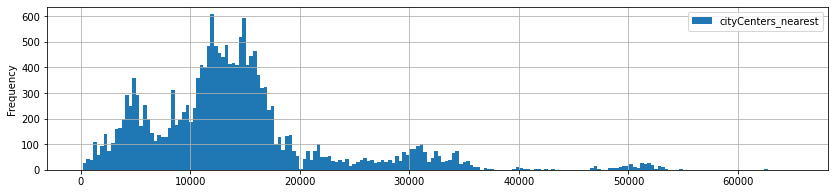

In [124]:
data.plot(y = 'cityCenters_nearest', kind = 'hist', bins = 200, grid=True, figsize = (14,3), range = (180,65000));

Гистограмма имеет распределение, похожее на распределение Пуассона. Наиболее распространненые расстояние - 13 км от цента. При этом минимальное расстояние 180 метров, максимальное - 66 км.

#### Расстояние до ближайшего аэропорта

In [125]:
# изучим расстояние до ближайшего аэропорта
data['airports_nearest'].describe()

count    17986.000000
mean     28811.331146
std      12642.545380
min          0.000000
25%      18575.250000
50%      26763.500000
75%      37310.000000
max      84869.000000
Name: airports_nearest, dtype: float64

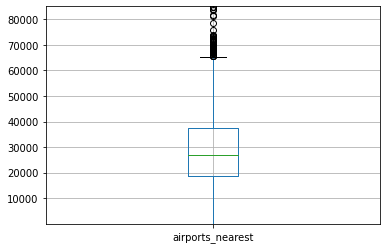

In [126]:
data.boxplot('airports_nearest')
plt.ylim(1, 85000);

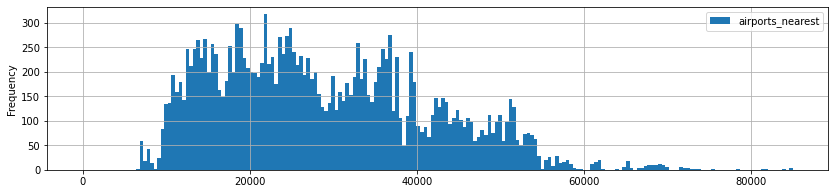

In [127]:
data.plot(y = 'airports_nearest', kind = 'hist', bins = 200, grid=True, figsize = (14,3), range = (1,85000));

Распределение приближено к распределению Пуассона. По гистограмме больше всего квартир наблюдается в 22-36 км от аэропорта. Среднее расстояние от аэропорта - 26 км.

#### Расстояние до ближайшего парка

In [128]:
# изучим расстояние до ближайшего парка
data['parks_nearest'].describe()

count    8002.000000
mean      490.615721
std       342.115190
min         1.000000
25%       288.000000
50%       454.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

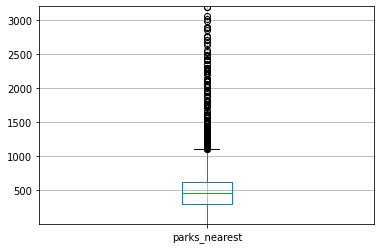

In [129]:
data.boxplot('parks_nearest')
plt.ylim(1, 3200);

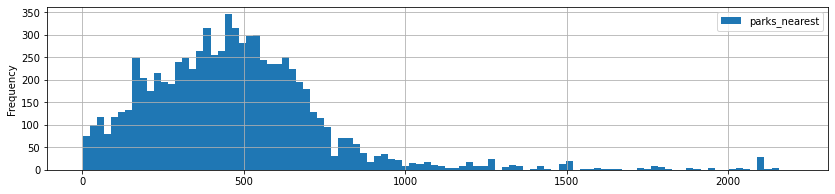

In [130]:
data.plot(y = 'parks_nearest', kind = 'hist', bins = 100, grid=True, figsize = (14,3), range = (1,2200));

Наблюдается пик на расстоянии 498 м до парк, там расположено больше всего квартир. Расстояние до парка варьируется от 1 метра до 3 км.

#### День и месяц публикации объявлений

In [131]:
# изучим день и месяц публикации объявлений
data['day'].describe()

count    23445.000000
mean         2.567840
std          1.788145
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: day, dtype: float64

In [132]:
data['month'].describe()

count    23445.000000
mean         6.397526
std          3.491105
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: month, dtype: float64

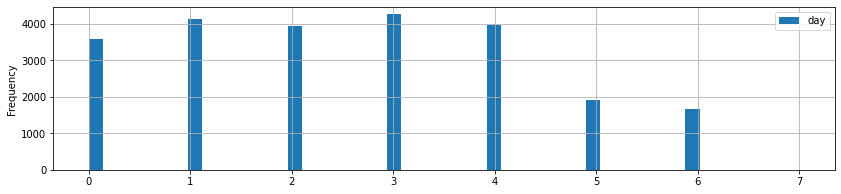

In [133]:
data.plot(y = 'day', kind = 'hist', bins = 50, grid=True, figsize = (14,3), range = (0,7));

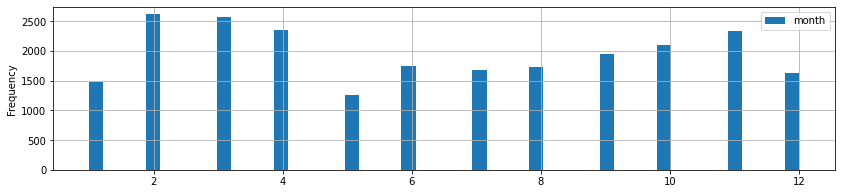

In [134]:
data.plot(y = 'month', kind = 'hist', bins = 50, grid=True, figsize = (14,3), range = (1,12));


Чаще всего размещают объявления со вторника по пятницу, намного реже - в выходные. Наблюдается рост объявлений в февраль-апрель, спад в мае, т.к. скорее всего в этом месяце много выходных и людям не до квартир. И с июня наблюдается пост публикаций объявлений до ноября.

#### Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней было размещено каждое объявление.

In [135]:
data['days_exposition'].describe()

count    20284.000000
mean       181.212581
std        220.123905
min          1.000000
25%         45.000000
50%         96.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

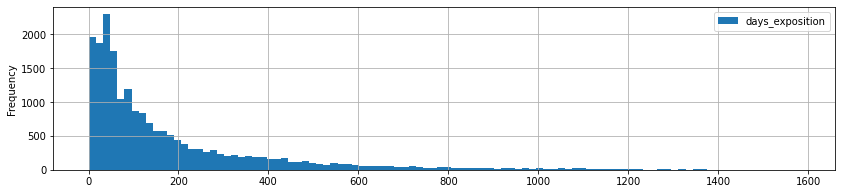

In [136]:
data.plot(y = 'days_exposition', kind = 'hist', bins = 100, grid=True, figsize = (14,3), range = (1,1580));

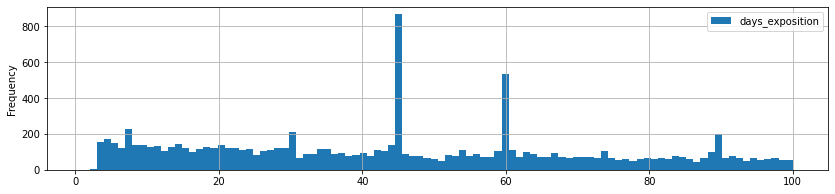

In [137]:
data.plot(y = 'days_exposition', kind = 'hist', bins = 100, grid=True, figsize = (14,3), range = (1,100));

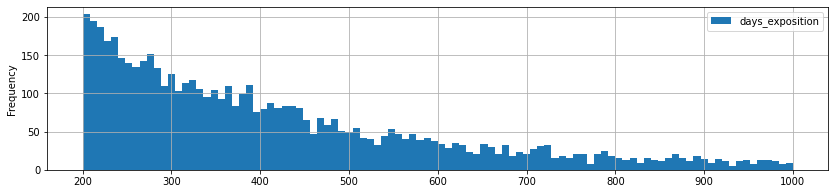

In [138]:
data.plot(y = 'days_exposition', kind = 'hist', bins = 100, grid=True, figsize = (14,3), range = (200,1000));

In [139]:
print('Среднее значение равно', round(data['days_exposition'].mean(), 1))
print('Медиана равна', data['days_exposition'].median())

Среднее значение равно 181.2
Медиана равна 96.0


Из приведенных данных можно сделать вывод, что продажа квартиры занимает от 3 до 6 месяцев. Все, что продается раньше 60 дней можно назвать быстрой продажей (пик на средней гистограмме), необычно долгие продажи - от 1.5 года (последняя гистограмма).
Наблюдаются аномальные пики на 45, 60, 90 дней.

#### Какие факторы больше всего влияют на общую (полную) стоимость объекта? Изучите, зависит ли цена от:
- общей площади;
- жилой площади;
- площади кухни;
- количества комнат;
- этажа, на котором расположена квартира (первый, последний, другой);
- даты размещения (день недели, месяц, год).
Постройте графики, которые покажут зависимость цены от указанных выше параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы.

**Зависимость цены от общей площади квартиры**

In [140]:
pivot_price_total_area=data.pivot_table(index='total_area', values='last_price', aggfunc = ['mean', 'count', 'median'])

In [141]:
pivot_price_total_area.columns = ['mean', 'count', 'median']

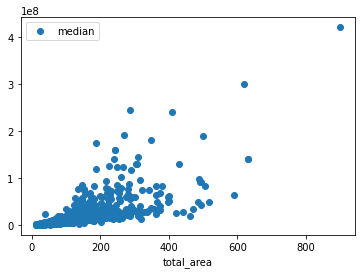

In [142]:
pivot_price_total_area.plot(y = 'median', style = 'o');

In [143]:
print('Корреляция цены от общей площади квартиры', data['total_area'].corr(data['last_price']))

Корреляция цены от общей площади квартиры 0.7129586832175187


In [144]:
pivot_price_total_area.sort_values('median', ascending = False)

,mean,count,median
total_area,,,
900.00,420000000.0,1,420000000.0
618.00,300000000.0,1,300000000.0
285.70,245000000.0,1,245000000.0
410.00,240000000.0,1,240000000.0
268.00,190870000.0,1,190870000.0
...,...,...,...
25.90,1200000.0,1,1200000.0
14.00,1190000.0,1,1190000.0
28.60,2034000.0,5,1060000.0


Исходя из графика и значения корреляции наблюдается высокая зависимость между ценой и общей площадью. Коэффициент корреляции равняется 0.71 То есть, чем больше площадь, тем больше стоимость квартиры, что логично.

**Зависимость цены от жилой площади квартиры**

<AxesSubplot:xlabel='living_area'>

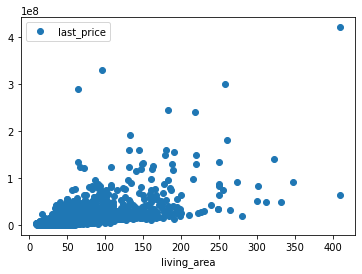

In [145]:
data.plot(x='living_area', y = 'last_price', style = 'o')

In [146]:
print('Корреляция цены от жилой площади квартиры', data['living_area'].corr(data['last_price']))

Корреляция цены от жилой площади квартиры 0.6269633701807183


Исходя из графика и значения корреляции наблюдается достаточно высокая зависимость между ценой и жилой площадью. Коэффициент корреляции равняется 0.62 То есть, чем больше жилая площадь, тем больше стоимость квартиры.

**Зависимость цены от площади кухни**

In [147]:
pivot_price_kitchen_area=data.pivot_table(index='kitchen_area', values='last_price', aggfunc = ['mean', 'count', 'median'])

In [148]:
pivot_price_kitchen_area.columns = ['mean', 'count', 'median']

<AxesSubplot:xlabel='kitchen_area'>

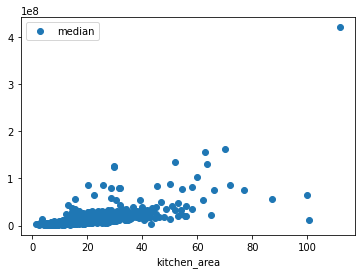

In [149]:
pivot_price_kitchen_area.plot(y = 'median', style = 'o')

In [150]:
print('Корреляция цены от площади кухни', data['kitchen_area'].corr(data['last_price']))

Корреляция цены от площади кухни 0.5545876610245265


In [151]:
pivot_price_kitchen_area.sort_values('median', ascending = False)

,mean,count,median
kitchen_area,,,
112.00,420000000.0,1,420000000.0
70.00,162150000.0,2,162150000.0
63.00,155000000.0,1,155000000.0
52.00,135000000.0,1,135000000.0
63.40,130000000.0,1,130000000.0
...,...,...,...
5.14,1800000.0,1,1800000.0
6.22,1720000.0,1,1720000.0
6.73,1718857.0,1,1718857.0


Исходя из графика и значения корреляции наблюдается высокая зависимость между ценой и жилой площадью. Коэффициент корреляции равняется 0.55 То есть, чем больше площадь кухни, тем больше стоимость квартиры. Но в сравнении с коэффицентом корреляции общей площади и жилой площади, взаимосвязь слабее.

**Зависимость цены от количества комнат**

In [152]:
pivot_price_rooms=data.pivot_table(index='rooms', values='last_price', aggfunc = ['mean', 'count', 'median'])

In [153]:
pivot_price_rooms.columns = ['mean', 'count', 'median']

<AxesSubplot:xlabel='rooms'>

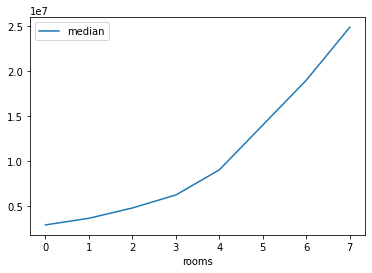

In [154]:
pivot_price_rooms.query('count > 20').plot(y = 'median')

In [155]:
print('Корреляция цены от количества комнат', data['rooms'].corr(data['last_price']))

Корреляция цены от количества комнат 0.4030653123210364


In [156]:
pivot_price_rooms.sort_values('median', ascending = False)

,mean,count,median
rooms,,,
12,4.200000e+08,1,420000000
15,6.500000e+07,1,65000000
19,3.225000e+07,1,32250000
16,2.850000e+07,1,28500000
14,2.682950e+07,2,26829500
11,2.525000e+07,2,25250000
7,3.910060e+07,57,24900000
9,3.415236e+07,8,23750000
8,5.022417e+07,12,23095000


Исходя из графика и значения корреляции наблюдается низкая зависимость между ценой и количеством комнат. Кореляция равна 0.4

**Зависимость цены от этажа**

,mean,count,median
type_floor,,,
другой,6.682619e+06,17188,4850000
первый,4.796518e+06,2885,3900000
последний,7.005384e+06,3290,4300000


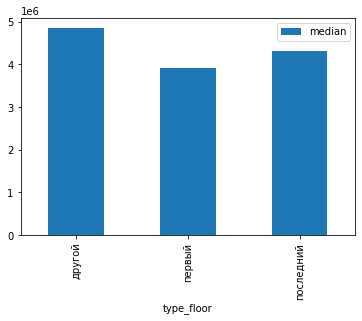

In [157]:
pivot_table_floor_category = data.pivot_table(index = 'type_floor', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_floor_category.columns = ['mean', 'count', 'median']
pivot_table_floor_category.plot(kind='bar', y = 'median')
pivot_table_floor_category

Как правило у квартир на первом этаже цена ниже, чем квартиры на этажах выше. Согласно медиане, квартиры на первом этаже дешевле квартир на последнем этаже примерно на 10%

**Зависимость цены от дня недели**

,mean,count,median
day,,,
1,6.396154e+06,4139,4730000
2,6.625568e+06,3930,4700000
0,6.515705e+06,3576,4650000
3,6.703768e+06,4256,4650000
4,6.375656e+06,3957,4590000
5,6.405613e+06,1914,4577500
6,6.268470e+06,1673,4550000


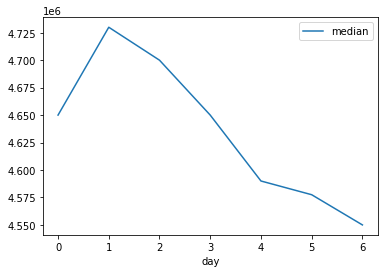

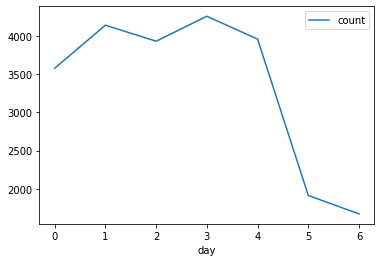

In [158]:
pivot_table_day_exposition = data.pivot_table(index = 'day', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_day_exposition.columns = ['mean', 'count', 'median']
pivot_table_day_exposition.plot(y = 'median')
pivot_table_day_exposition.plot(y = 'count')
pivot_table_day_exposition.sort_values('median', ascending = False)

Исходя из графика, максимальная цена на квартиры наблюдается во вторник, а потом цена постепенно снижается к выходным в среднем на 4%. Возможно, это как-то связано с тем, что максимальное количество объявлений размещается начиная со вторника и набирает своего пика в четверг. Предложение превышает спрос и на этом фоне продавцы начинают снижать стоимость, чтобы как-нибудь привлечь покупателей.

**Зависимость цены от месяца размещения**

,mean,count,median
month,,,
4,6.751749e+06,2356,4800000
9,6.458620e+06,1957,4700000
11,6.444824e+06,2342,4700000
12,7.017465e+06,1622,4700000
3,6.366296e+06,2566,4660000
2,6.332341e+06,2614,4650000
1,6.690608e+06,1482,4600000
7,6.605324e+06,1675,4600000
8,6.345120e+06,1727,4590000


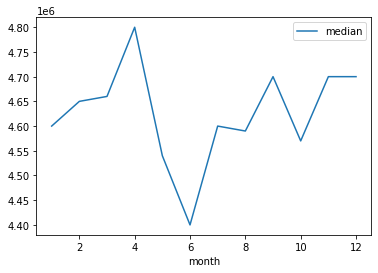

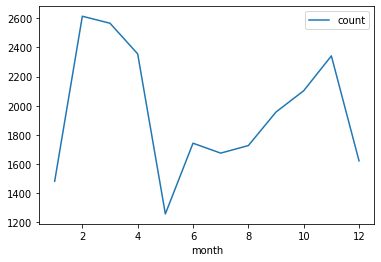

In [159]:
pivot_table_month_exposition = data.pivot_table(index = 'month', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_month_exposition.columns = ['mean', 'count', 'median']
pivot_table_month_exposition.plot(y = 'median')
pivot_table_month_exposition.plot(y = 'count')
pivot_table_month_exposition.sort_values('median', ascending = False)

Самая высокая стоимость квартир наблюдается в апреле и сентябре, самая низкая - в мае, июне. 
Рынoк нeдвижимocти нaибoлee пoдвepжeн ceзoнным пepeпaдaм. Ha cepeдинy зимы пpиxoдятcя длитeльныe нoвoгoдниe пpaздники, предложение превышает спрос и цены на квартиры снижены. В то время, как количество квартир увеличивалось, цена на квартиры уменьшалась. Начиная с марта, количество предложений постепенно уменьшается, повышается спрос и наблюдается некоторое повышение цен. Пик цен наблюдается в апреле. В мае-июне самый оптимальный период покупки квартиры. Спрос на недвижимость падает. Это связано с тем, что люди уезжают в отпуска, проводят много времени на природе и не готовы полноценно посвещать себя рабочими вопросами. В связи со снижением спроса, продавцы снижают цену. Осенью активность и покупателей и продавцов возрастает, поэтому увеличивается и количество квартир и стоимость квартир.

**Зависимость цены от года размещения**

,mean,count,median
year,,,
2014,1.213889e+07,133,7700000
2015,8.552942e+06,1166,5337000
2019,6.789348e+06,2858,5065000
2016,6.703296e+06,2746,4550000
2018,5.943521e+06,8434,4550000
2017,6.511280e+06,8108,4500000


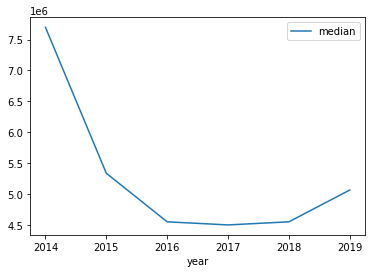

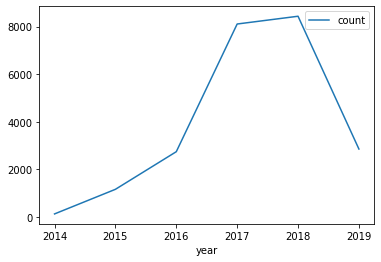

In [160]:
pivot_table_year_exposition = data.pivot_table(index = 'year', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_year_exposition.columns = ['mean', 'count', 'median']
pivot_table_year_exposition.plot(y = 'median')
pivot_table_year_exposition.plot(y = 'count')
pivot_table_year_exposition.sort_values('median', ascending = False)

С 2014 года до 2016 стоимость квартир уменьшалась, с 2016-2018 год стоимость квартир была на одном уровне и, начиная с 2018 года она начинает расти. Возможно, это связано с увеличение из года в год предложений на рынке недвижимости с пиком в 2018 году, при этом платежеспособность граждан после кризиса 2014 года не так быстро восстанавливалась . В данном случае мы не рассматриваем сегментацию рынка и говорим про ситуацию в среднем по рынку.

#### Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце locality_name.

In [161]:
pivot_city_meters=data.pivot_table(index='new_name', values='price_per_meter', aggfunc=['count', 'mean'])

In [162]:
pivot_city_meters.columns=['count', 'mean']

In [163]:
pivot_city_meters=pivot_city_meters.sort_values(by='count', ascending = False).head(10)

In [164]:
pivot_city_meters

,count,mean
new_name,,
Санкт-Петербург,15602,114563.512713
Мурино,577,85745.852409
Кудрово,460,95140.565761
Шушары,439,78673.295877
Всеволожск,392,68552.215561
Пушкин,368,103180.403478
Колпино,336,75501.267768
Парголово,325,90161.701662
Гатчина,302,68816.292483


In [165]:
print('Самая высокая стоимость квартиры: ')
print(pivot_city_meters[pivot_city_meters['mean']==pivot_city_meters['mean'].max()])

Самая высокая стоимость квартиры: 
                 count           mean
new_name                             
Санкт-Петербург  15602  114563.512713


In [166]:
print('Самая низкая стоимость квартиры: ')
print(pivot_city_meters[pivot_city_meters['mean']==pivot_city_meters['mean'].min()])

Самая низкая стоимость квартиры: 
          count          mean
new_name                     
Выборг      234  58361.305085


<AxesSubplot:xlabel='new_name'>

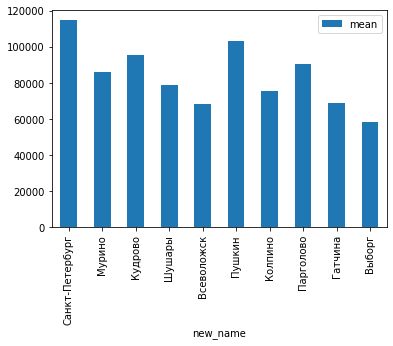

In [167]:
pivot_city_meters.plot(kind='bar', y = 'mean')

#### Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города.

In [168]:
pivot_locality_centre=data.query('locality_name=="Санкт-Петербург"').pivot_table(index='centr_km', values='last_price', aggfunc=['mean', 'median'])
pivot_locality_centre.columns=['mean', 'median']

In [169]:
pivot_locality_centre

,mean,median
centr_km,,
0.0,3.138947e+07,15900000
1.0,2.120672e+07,11395000
2.0,1.661394e+07,10000000
3.0,1.114070e+07,8418000
4.0,1.217415e+07,9200000
5.0,1.452100e+07,9495000
6.0,1.519694e+07,8895000
7.0,1.482078e+07,7800000
8.0,9.968489e+06,7440000


<AxesSubplot:xlabel='centr_km'>

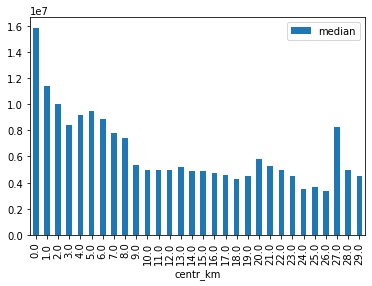

In [170]:
pivot_locality_centre.plot(kind='bar', y='median')

Чем ближе к центру, тем квартиры стоят больше. При этом стоимость квартиры в самом центре и в 1 км от центра выше на 30%. 

### Общий вывод

Были обработаны и исследованы данные сервиса Яндекс Недвижимость за 2014-2019 годы о продаже квартир в Санкт-Петербурге и соседних населенных пунктах. 
Была выполнена предобработка данных - обработали пропущенные значения, там, где это было возможно; заменили типы данных для удобной работы. Были удалены аномальные значения меньше 1%. Были устранены неявные дубликаты в столбце "Название населенного пункта".
Посчитали и добавили в таблицу цену одного кв.м., вывели из даты день недели, месяц и год, добавили тип этажа квартиры и расстояние дл центра в километрах.
Изучили следующие параметры на наличие выбросов - общая площадь; жилая площадь; площадь кухни; цена объекта; количество комнат; высота потолков; этаж квартиры; тип этажа квартиры («первый», «последний», «другой»); общее количество этажей в доме; расстояние до центра города в метрах; расстояние до ближайшего аэропорта; расстояние до ближайшего парка; день и месяц публикации объявления. Изучая данные параметры, было выявлено,что самые распространенные квартиры площадью 30-45 кв.м, 1-2комнатные, расположенные выше 1-го этажа.
Самая высокая стоимость квартир наблюдается в апреле и сентябре, самая низкая - в мае, июне. 

Рынoк нeдвижимocти нaибoлee пoдвepжeн ceзoнным пepeпaдaм. Ha cepeдинy зимы пpиxoдятcя длитeльныe нoвoгoдниe пpaздники, предложение превышает спрос и цены на квартиры снижены. В то время, как количество квартир увеличивалось, цена на квартиры уменьшалась. Начиная с марта, количество предложений постепенно уменьшается, повышается спрос и наблюдается некоторое повышение цен. Пик цен наблюдается в апреле. В мае-июне самый оптимальный период покупки квартиры. Спрос на недвижимость падает. Это связано с тем, что люди уезжают в отпуска, проводят много времени на природе и не готовы полноценно посвещать себя рабочими вопросами. В связи со снижением спроса, продавцы снижают цену. Осенью активность и покупателей и продавцов возрастает, поэтому увеличивается и количество квартир и стоимость квартир.

Если говорить об изменении стоимости квартир начиная с 2014 года по 2016 стоимость квартир уменьшалась, с 2016-2018 год стоимость квартир была на одном уровне и, начиная с 2018 года она начинает расти. Возможно, это связано с увеличение из года в год предложений на рынке недвижимости с пиком в 2018 году, при этом платежеспособность граждан после кризиса 2014 года не так быстро восстанавливалась . В данном случае мы не рассматриваем сегментацию рынка и говорим про ситуацию в среднем по рынку.

В среднем квартиры продаются от 3 до 6 месяцев с момента публикации объявления

Мы выявили, что на стоимость квартир в большей степени влияют общая пложадь квартиры, жилая площадь, площадь кухни и количество комнат. Также квартиры, находящиеся от 2-го этажа и выше, стоят больше, чем квартиры на первом этаже.


Выявили 10 населенных пунктов с наибольшим числом квартир, как и ожидалось, больше всего квартир продается в Санкт-Петербурге с большей стоимостью одного квадратного метра, при этом квартиры, которые расположены до 1 км от центра стоят на 30% дороже, чем квартиры в диапозоне 1-2 км. Казалось бы, не так уж и далеко, а стоимость отличается разительно.
Из этих 10 квартир самая низкая стоимость за 1 кв.м. в городе Выборг.
